In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

4422102/4422102 [==============================] - 3s 1us/step


0)	T-shirt/top
1)	Spodnie
2)	Zjechać na pobocze
3)	Sukienka
4)	Płaszcz
5)	Sandał
6)	Koszula
7)	tenisówki
8)	Torba
9)	Buty za kostkę

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

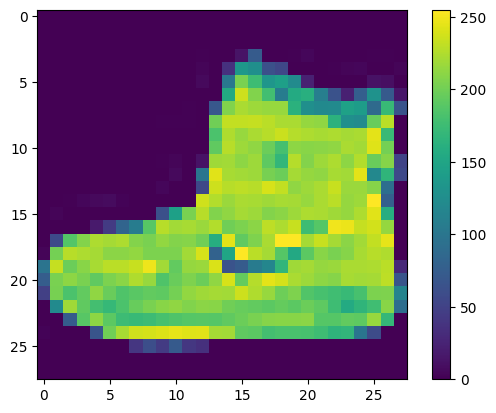

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

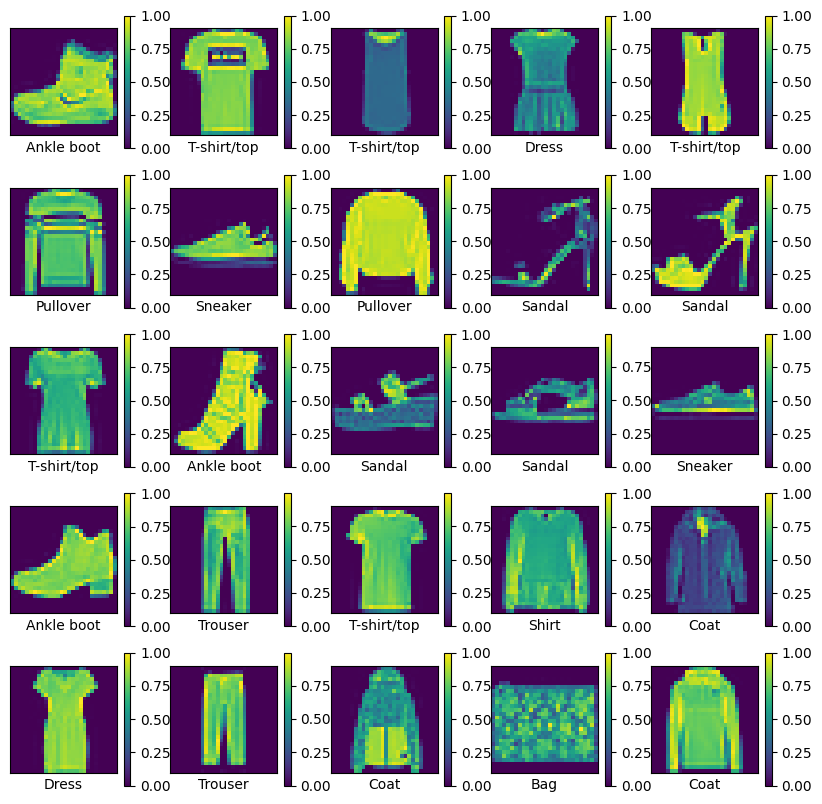

In [16]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.grid(False)
    plt.xlabel(class_names[train_labels[i]])


In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

tf.keras.Sequential - tworzy sieć/ sekwencję <br>
tf.keras.layers.Flatten(input_shape=(28, 28)) - tak samo jak w np jedynie wypłaszcza dane, nie zmienie danych w typowy dla DNN sposób <br>
tf.keras.layers.Dense(128, activation='relu') - faktyczne hidden_layers, w środku jest 128 neuronów, a funkcją aktywacji jest relu (zeruje wartości ujemne) <br> 
tf.keras.layers.Dense(10) - na ten momeny output_layer, zwraca 10 logitów (jest to surowa wartość predykcji), każdy z nich odpowiada jednej klasie <br>

In [21]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.compile - funkcja, która pozwala Ci na zmianę parametrów uczenia się Twojego modelu <br>
optimizer='adam' - optymalizator, to algorytm, który odpowiada za minimalizację funkcji straty
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) - określa jakiej funkcji straty będziemy używać, ta konkretna nadaje się do wielu klas liczbowych <br>
metrics=['accuracy'] - dodatkowe parametry ewaluacji modelu (może być ich kilka). Accuracy sprawdza ile etykiet przewidział poprawnie

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4980 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3740 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3343 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3120 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2944 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2803 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2693 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2570 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2469 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

Standardowe trenowanie jak w Sklearn - zdecydowanie szybsze i dostarczające więcej informacji

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3450 - accuracy: 0.8792 - 407ms/epoch - 1ms/step

Test accuracy: 0.8791999816894531


model.evaluate - funkcja, która służy do testowania modelu <br>
Przyjmuje one X, y. Zwraca w zależności od ilości klas różną liczbę ocen modelu. <br>
verbose=2 - dokładność przedstawienia wyników <br>
<br>
W tym przypadku acc testowa jest niższa niż acc treningowa, ta różnica bierze się z przetrenowania modelu

In [24]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

W tym przypadku, do isteniejącego modelu dokładamy kolejną warstę. Jest ona funkcją wyjąściową, która zamienia logity, na prawdopodobieństwa zgodnie z funkcją Softmax (jest skomplikowana, ale pozwala na sumę prawdopodobieństwa do 1)

In [25]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 943us/step


probability_model.predict - pozwala na predykcje, zwraca listę wyników

In [26]:
predictions[0]

array([1.5818634e-08, 1.2236994e-07, 1.8461209e-09, 1.4878749e-08,
       3.1376590e-08, 1.5777924e-04, 4.2800583e-08, 5.7320893e-03,
       6.8756304e-07, 9.9410915e-01], dtype=float32)

In [27]:
print(f"Przewidziana etykieta {np.argmax(predictions[0])}")
print(f"Prawdziwa etykieta {test_labels[0]}")

Przewidziana etykieta 9
Prawdziwa etykieta 9


In [28]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Funkcje, które w tym tutorialu służą do przedstawienia wyników predykcji w przystępny sposób. Pierwsza odpawiada za lewą część wykresu, czyli obraz i tytuł z predykcją (niebieska jest poprawna, a czerwona błędna).

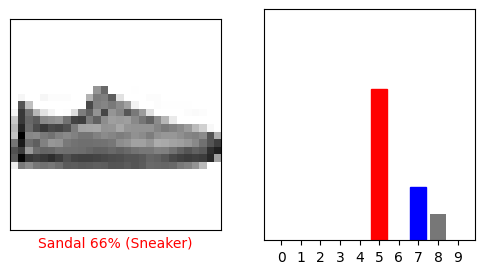

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

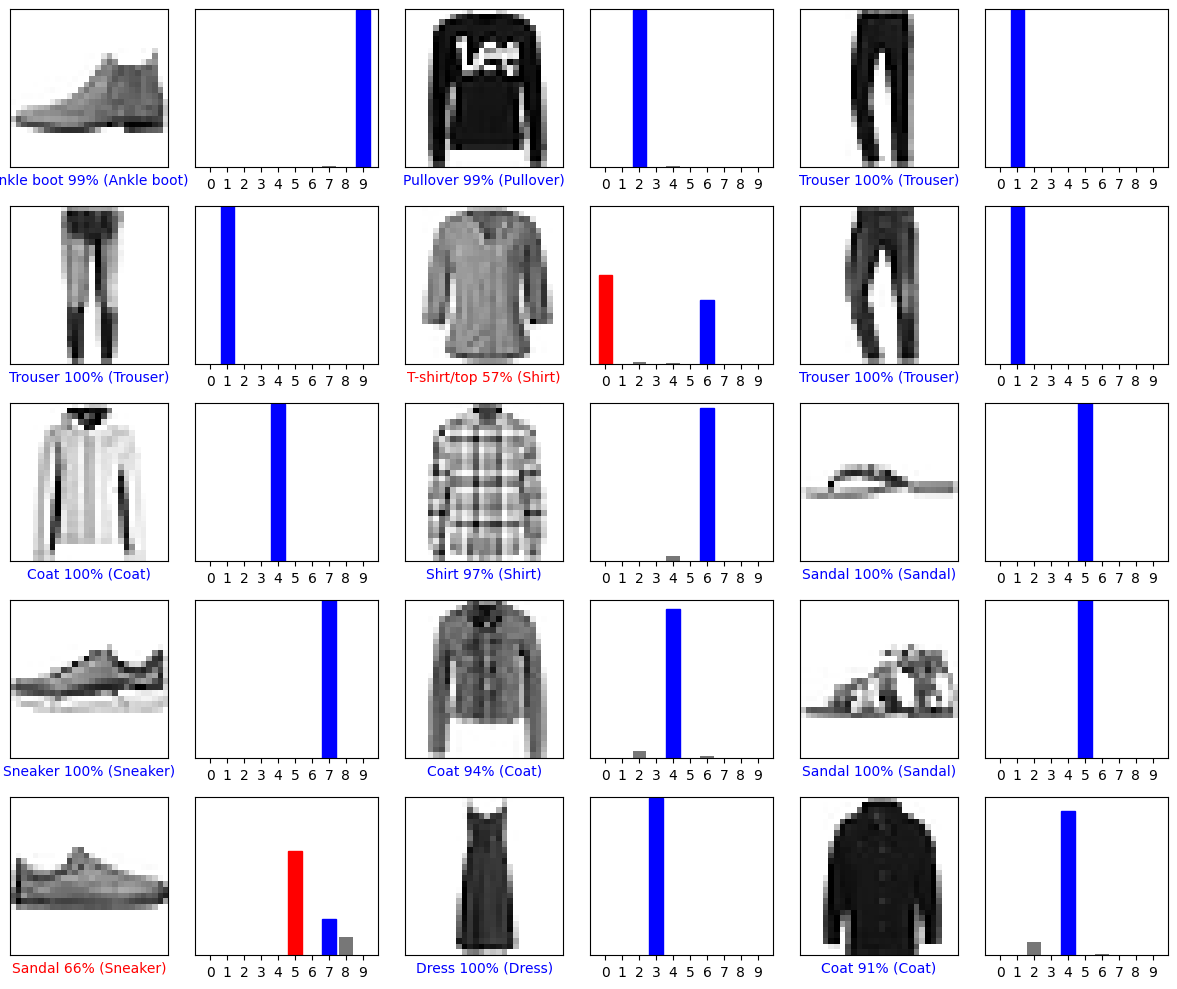

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [32]:
img = test_images[1]

print(img.shape)

img = (np.expand_dims(img,0))

print(img.shape)

(28, 28)
(1, 28, 28)


Jest również możliwość dokonywania predykcji pojedynczego obrazu, ale dalej musi on być w liście, dlatego dodaliśmy kolejny wymiar

1/1 [==============================] - 0s 26ms/step
[[1.9211709e-04 1.7694273e-09 9.9230206e-01 4.0649041e-08 6.2922342e-03
  1.3694551e-13 1.2136119e-03 3.6846615e-12 3.7536111e-08 4.6987031e-10]]


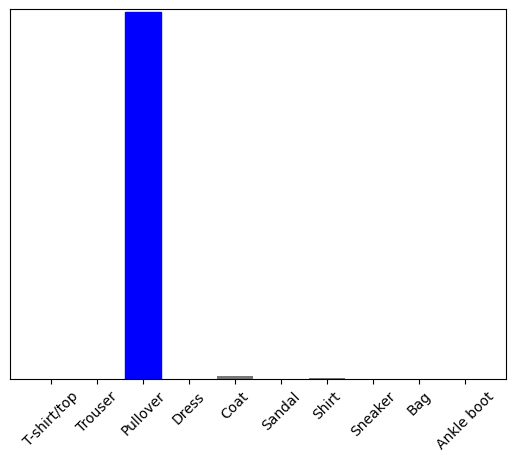

In [33]:
predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()